In [1]:
import numpy as np
import os
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('C:/Users/subed/SportsPersonClassifier/model/test_picture/ronaldo.jpg')
img.shape

(256, 197, 3)

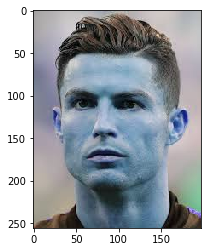

In [3]:
plt.imshow(img)

In [4]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(256, 197)

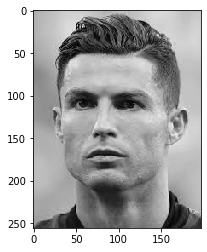

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('C:/Code/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Code/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 12,  52, 151, 151]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(12, 52, 151, 151)

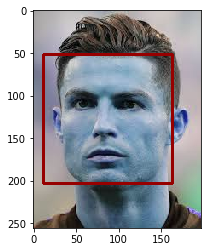

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(150,0,0),2)
plt.imshow(face_img)

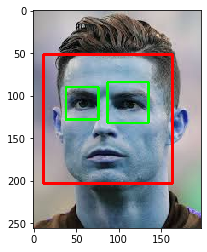

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

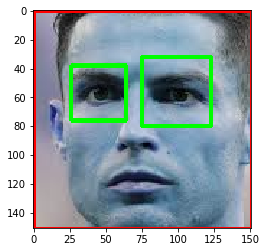

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')  # roi_color gives the rectangular region.

In [39]:
# This function will return the image where face and eyes are clear.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:  
            return roi_color
        
        

We see from the above picture the face and eyes are not clearly detected. 

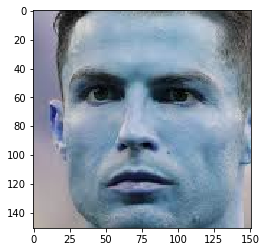

In [42]:
cropped_img = get_cropped_image_if_2_eyes('C:/Users/subed/SportsPersonClassifier/model/test_picture/ronaldo.jpg')
plt.imshow(cropped_img)

In [40]:
img1 = cv2.imread('C:/Users/subed/SportsPersonClassifier/model/test_picture/ronaldo1.jpg')
img1.shape

(225, 225, 3)

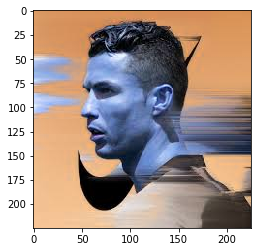

In [41]:
plt.imshow(img1)

In [48]:
no_eyes_image = get_cropped_image_if_2_eyes('C:/Users/subed/SportsPersonClassifier/model/test_picture/ronaldo1.jpg')
if no_eyes_image is None:
     
    print("No output because we cannot detect 2 eyes or face")
else:
    print(no_eyes_image)
    

#Since another picture of ronaldo was not clear enough to detect 2 eyes, so it didn't return anything.

No output because we cannot detect 2 eyes or face


We tested so far with just 2 images. Now just clean the whole images from the dataset folder.

In [65]:
path_to_data = 'C:/Users/subed/SportsPersonClassifier/model/dataset/'
path_to_cr_data= 'C:/Users/subed/SportsPersonClassifier/model/cropped/'

In [66]:
import os
img_dirs = []
for entry in os.scandir(path_to_data): #it will go through all the sub-directory of the directory
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs       # this gives the path of each individual player directory.

['C:/Users/subed/SportsPersonClassifier/model/dataset/cristiano_ronaldo',
 'C:/Users/subed/SportsPersonClassifier/model/dataset/david_beckham',
 'C:/Users/subed/SportsPersonClassifier/model/dataset/eden_hazard',
 'C:/Users/subed/SportsPersonClassifier/model/dataset/lionel_messi',
 'C:/Users/subed/SportsPersonClassifier/model/dataset/mohammad_salah',
 'C:/Users/subed/SportsPersonClassifier/model/dataset/neymar']

In [67]:
 import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) # if there is any pre-existing folder then it will remove that.
os.mkdir(path_to_cr_data)    # this line will create a folder name "cropped"


In [68]:
for img_dir in img_dirs:
    
    celebrity_name = img_dir.split('/')[-1] # This will split by "\\" and will take the last name
    print(celebrity_name)
    
    

cristiano_ronaldo
david_beckham
eden_hazard
lionel_messi
mohammad_salah
neymar


In [69]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count)+".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1   

cristiano_ronaldo
Generating cropped images in folder:  C:/Users/subed/SportsPersonClassifier/model/cropped/cristiano_ronaldo
david_beckham
Generating cropped images in folder:  C:/Users/subed/SportsPersonClassifier/model/cropped/david_beckham
eden_hazard
Generating cropped images in folder:  C:/Users/subed/SportsPersonClassifier/model/cropped/eden_hazard
lionel_messi
mohammad_salah
Generating cropped images in folder:  C:/Users/subed/SportsPersonClassifier/model/cropped/mohammad_salah
neymar
Generating cropped images in folder:  C:/Users/subed/SportsPersonClassifier/model/cropped/neymar


After this we will extract the facial features like nose, eyes and so on.

Or We will be using Wavelet Transform technique.

In [70]:
import numpy as np
import pywt
import cv2

In [71]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


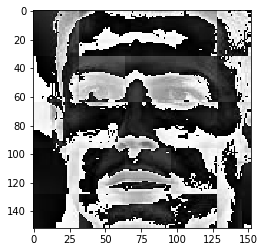

In [75]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
